In [1]:
%matplotlib inline

from skimage import transform
from skimage import data

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.mlab as mlab
import numpy as np
import os
import time

from tensorflow.examples.tutorials.mnist import input_data

def plot(samples, w, h, fw, fh, iw=28, ih=28):
    
    fig = plt.figure(figsize=(fw, fh))
    gs = gridspec.GridSpec(w, h)
    gs.update(wspace=0.05, hspace=0.05)


    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(iw, ih), cmap='Greys_r')

    return fig

mnist = input_data.read_data_sets("../DATASETS/MNIST_TF/", one_hot=True)

Extracting ../DATASETS/MNIST_TF/train-images-idx3-ubyte.gz
Extracting ../DATASETS/MNIST_TF/train-labels-idx1-ubyte.gz
Extracting ../DATASETS/MNIST_TF/t10k-images-idx3-ubyte.gz
Extracting ../DATASETS/MNIST_TF/t10k-labels-idx1-ubyte.gz


# Translation example

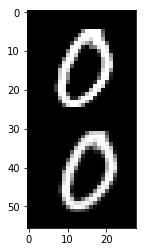

In [2]:
image = mnist.train.images[np.random.randint(mnist.train.images.shape[0])].reshape(28,28)

shift_y, shift_x = np.array(image.shape[:2]) / 10.

b = -1
a = 1

random_shift_x = ((b - a) * np.random.random() + a) * shift_x
random_shift_y = ((b - a) * np.random.random() + a) * shift_y

tf_shift = transform.SimilarityTransform(translation=[random_shift_x, random_shift_y])
image_translated = transform.warp(image, tf_shift)

images = np.vstack([image, image_translated])

plt.imshow(images, cmap='Greys_r')
plt.show()

# Rotation example

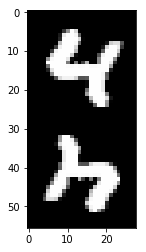

In [3]:
image = mnist.train.images[np.random.randint(mnist.train.images.shape[0])].reshape(28,28)

b = -1
a = 1

#random_rotation = np.deg2rad(((b - a) * np.random.random() + a) * 45)
random_rotation = np.deg2rad(180)

shift_y, shift_x = np.array(image.shape[:2]) / 2.

tf_rotate = transform.SimilarityTransform(rotation=random_rotation)
tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

image_rotated = transform.warp(image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)

images = np.vstack([image, image_rotated])

plt.imshow(images, cmap='Greys_r')
plt.show()

# Transforming dataset

100% (55000 of 55000) |###################| Elapsed Time: 0:00:05 Time: 0:00:05
100% (55000 of 55000) |###################| Elapsed Time: 0:00:10 Time: 0:00:10


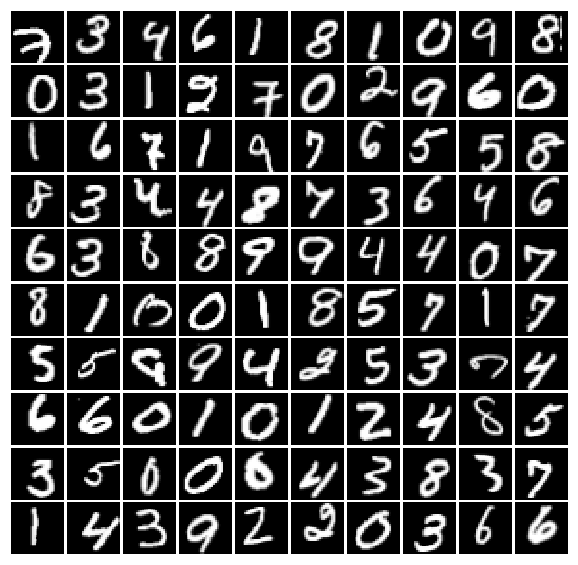

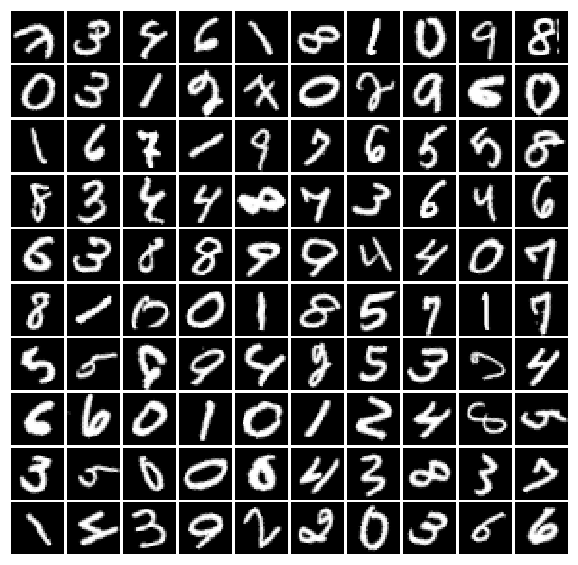

In [30]:
import progressbar

def random_rotation(sample):

    b = -1
    a = 1

    random_rotation = np.deg2rad(((b - a) * np.random.random() + a) * 45)

    shift_y, shift_x = np.array(sample.shape[:2]) / 2.

    tf_rotate = transform.SimilarityTransform(rotation=random_rotation)
    tf_shift = transform.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = transform.SimilarityTransform(translation=[shift_x, shift_y])

    image_rotated = transform.warp(sample, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    
    return image_rotated

def random_translation(sample):

    b = -1
    a = 1
    
    shift_y, shift_x = np.array(sample.shape[:2]) / 10.

    random_shift_x = ((b - a) * np.random.random() + a) * shift_x
    random_shift_y = ((b - a) * np.random.random() + a) * shift_y

    tf_shift = transform.SimilarityTransform(translation=[random_shift_x, random_shift_y])
    image_translated = transform.warp(sample, tf_shift)
    
    return image_translated


d1 = 28
d2 = 28

X = mnist.train.images.reshape(mnist.train.images.shape[0],d1,d2)
Y = mnist.train.labels

X_d1xd2 = np.reshape(X,(X.shape[0], d1, d2))

# one-to-one transformation
X_transformed_trans = np.zeros((X_d1xd2.shape[0], d1 * d2))
Y_transformed_trans = np.zeros((Y.shape[0], Y.shape[1]))

X_transformed_rot = np.zeros((X_d1xd2.shape[0], d1 * d2))
Y_transformed_rot = np.zeros((Y.shape[0], Y.shape[1]))

#widgets = ['Completed: ', progressbar.Percentage(), ' ', progressbar.Bar(marker='*',left='[',right=']'),
#           ' ', progressbar.ETA(), ' ', progressbar.FileTransferSpeed()] #see docs for other options

bar = progressbar.ProgressBar(max_value=X_transformed.shape[0])
bar.start()
for i in (range(X_transformed_trans.shape[0])):
    X_transformed_trans[i] = random_translation(X[i]).reshape(d1*d2)
    Y_transformed_trans[i] = Y[i].copy()
    bar.update(i)
bar.finish()

bar.start()
for i in (range(X_transformed_rot.shape[0])):
    X_transformed_rot[i] = random_rotation(X[i]).reshape(d1*d2)
    Y_transformed_rot[i] = Y[i].copy()
    bar.update(i)
bar.finish()

fig=plot(X_transformed_trans[:100], 10, 10, 10, 10)
plt.show()

fig=plot(X_transformed_rot[:100], 10, 10, 10, 10)
plt.show()